<a href="https://colab.research.google.com/github/JoskyPon/AI_in_PD/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 7. Основы Numpy. Построение графиков

Выполнил: Подгайный Александр <br>
Группа: ПИН-б-о-22-1

Цель работы: <br>
Необходимо
реализовать не менее 2 типов графиков. Учащийся самостоятельно выбирает
38
отображаемые данные: зарплату, численность сотрудников по отделам,
гистограмма заработной платы и т.д.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
!wget https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract4/p4_data_23.csv

--2024-10-18 11:15:37--  https://raw.githubusercontent.com/enikolaev/IT-and-Programming/main/data/pract4/p4_data_23.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46430 (45K) [text/plain]
Saving to: ‘p4_data_23.csv’

p4_data_23.csv      100%[===================>]  45.34K  --.-KB/s    in 0.007s  

2024-10-18 11:15:37 (6.47 MB/s) - ‘p4_data_23.csv’ saved [46430/46430]



In [9]:
F=open('p4_data_23.csv')
n_to_print=10
for line in F:
  n_to_print-=1
  if n_to_print>0:
    print(line)

ID,Name,Category,Salary,Count,Price

90-1634534,Toinette Glencrash,A,$860.44,28,$1.35

34-5872839,Ban Branford,A,$905.99,24,$3.69

58-2779834,Dora Cotta,B,$350.53,45,$38.00

95-7538777,Piper Salatino,A,$994.16,31,$8.36

04-5580973,Renata Nealon,D,$897.74,48,$3.19

70-6304241,Dulce Nerheny,B,$642.22,6,$22.14

42-0065280,Crystie Pedrozzi,,$791.97,35,$15.87

53-3706440,Lenore Brumpton,C,$982.22,29,$7.52



In [10]:
F=open('p4_data_23.csv')
header = F.readline().strip().split(',')
print(header)
print('-'*20)
n_to_print=10
for line in F:
  # производим обработку в любом случае ...
  data = line.strip().split(',')
  # ... аа печатаем только первые n_to_print
  n_to_print-=1
  if n_to_print>0:
    print(data)

['ID', 'Name', 'Category', 'Salary', 'Count', 'Price']
--------------------
['90-1634534', 'Toinette Glencrash', 'A', '$860.44', '28', '$1.35']
['34-5872839', 'Ban Branford', 'A', '$905.99', '24', '$3.69']
['58-2779834', 'Dora Cotta', 'B', '$350.53', '45', '$38.00']
['95-7538777', 'Piper Salatino', 'A', '$994.16', '31', '$8.36']
['04-5580973', 'Renata Nealon', 'D', '$897.74', '48', '$3.19']
['70-6304241', 'Dulce Nerheny', 'B', '$642.22', '6', '$22.14']
['42-0065280', 'Crystie Pedrozzi', '', '$791.97', '35', '$15.87']
['53-3706440', 'Lenore Brumpton', 'C', '$982.22', '29', '$7.52']
['43-8488790', 'Josiah Cona', 'D', '$578.96', '45', '$46.15']


In [15]:
# Доработаем предыдущий скрипт
F=open('p4_data_23.csv')
header = F.readline().strip().split(',')

# список всех работников
all_stuff=[]

for line in F:
  data = line.strip().split(',')
  stuff = {} # создаем пустой словарь
  for i, key in enumerate(header): # обходим все заголовки
    stuff[key] = data[i] # добавляем в словарь клюс:значение

  # некоторые значения придется конвертировать к подходящим типам
  stuff['Salary'] = float(stuff['Salary'][1:])
  stuff['Price'] = float(stuff['Price'][1:])

  all_stuff.append(stuff) # добавляем клиента в скписок

print(all_stuff[:10]) # напечатаем первых 10 клиентов

F.close() # файл больше не нужен

stuff_count = []

for stuff in all_stuff:
  stuff_count.append(stuff['Count'])

stuff_price = []

for stuff in all_stuff:
  stuff_price.append(stuff['Price'])


[{'ID': '90-1634534', 'Name': 'Toinette Glencrash', 'Category': 'A', 'Salary': 860.44, 'Count': '28', 'Price': 1.35}, {'ID': '34-5872839', 'Name': 'Ban Branford', 'Category': 'A', 'Salary': 905.99, 'Count': '24', 'Price': 3.69}, {'ID': '58-2779834', 'Name': 'Dora Cotta', 'Category': 'B', 'Salary': 350.53, 'Count': '45', 'Price': 38.0}, {'ID': '95-7538777', 'Name': 'Piper Salatino', 'Category': 'A', 'Salary': 994.16, 'Count': '31', 'Price': 8.36}, {'ID': '04-5580973', 'Name': 'Renata Nealon', 'Category': 'D', 'Salary': 897.74, 'Count': '48', 'Price': 3.19}, {'ID': '70-6304241', 'Name': 'Dulce Nerheny', 'Category': 'B', 'Salary': 642.22, 'Count': '6', 'Price': 22.14}, {'ID': '42-0065280', 'Name': 'Crystie Pedrozzi', 'Category': '', 'Salary': 791.97, 'Count': '35', 'Price': 15.87}, {'ID': '53-3706440', 'Name': 'Lenore Brumpton', 'Category': 'C', 'Salary': 982.22, 'Count': '29', 'Price': 7.52}, {'ID': '43-8488790', 'Name': 'Josiah Cona', 'Category': 'D', 'Salary': 578.96, 'Count': '45', 'P

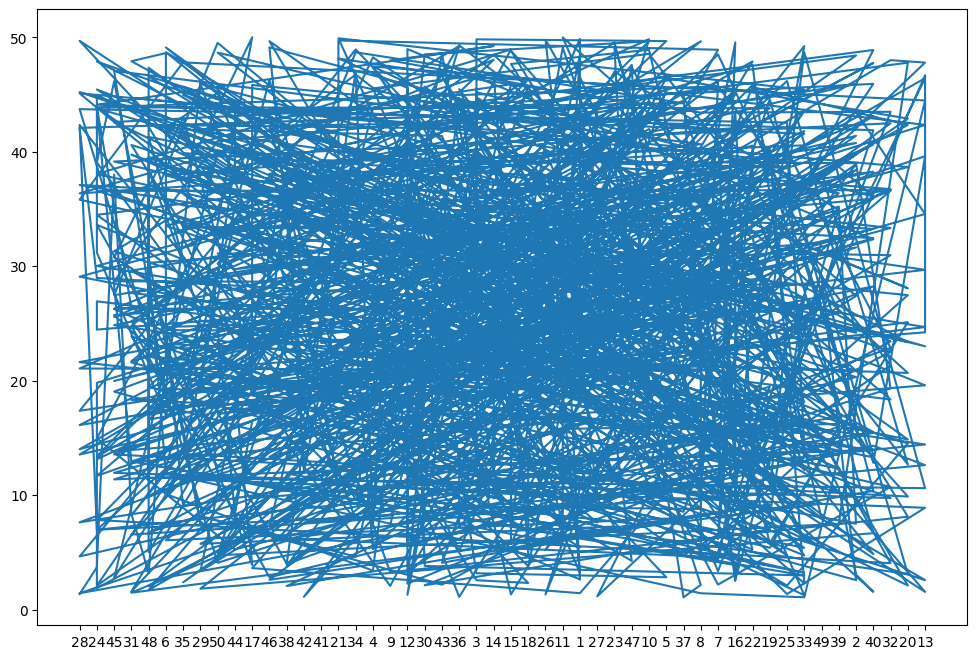

In [16]:
# Выполним построение простейшего графика

x = stuff_count
y = stuff_price
plt.figure(figsize=(12,8))
plt.plot(x, y)

<BarContainer object of 1000 artists>

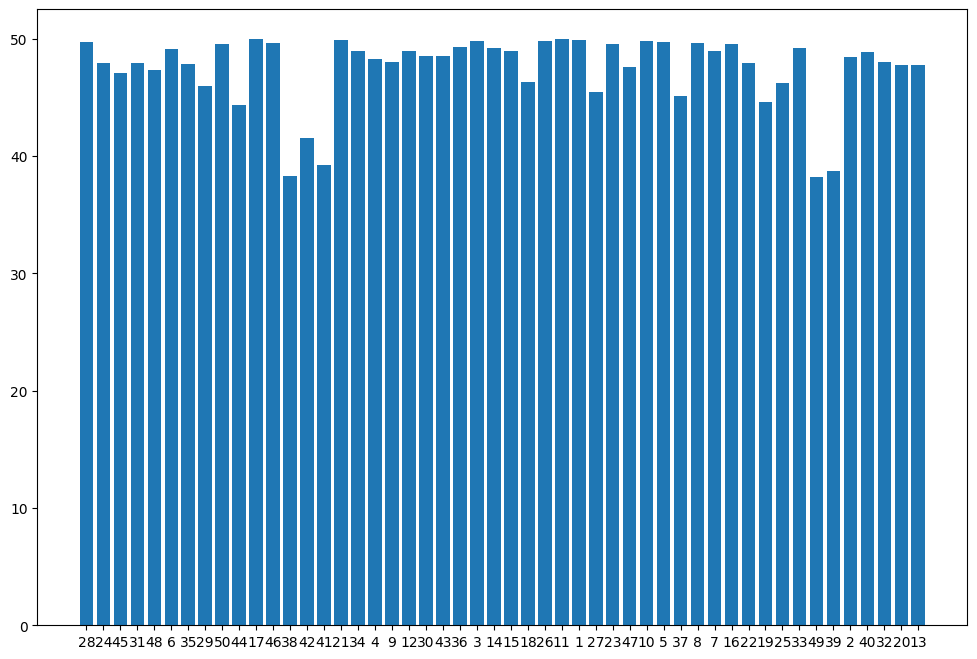

In [17]:
# Выполним построение простейшей стобчатой диаграммы

x = stuff_count
y = stuff_price
plt.figure(figsize=(12,8))
plt.bar(x, y)

Контрольные вопросы

1. Чем список python отличается от массива numpy?
 если вы работаете с числовыми данными и вам нужна скорость и эффективность, массивы NumPy - лучший выбор. Если вы работаете с данными разных типов и скорость не является решающим фактором, списки Python могут быть более удобным вариантом.
2. Продемонстрируйте варианты создания массива numpy: из списка, как
диапазон с заданным шагом, массив нуле, единиц.
3. Продемонстрируйте выполнение векторных операций с массивами numpy:
умножение вектора на число, сложение векторов.
4. Реализуйте построение векторов numpy с использованием генераторов
случайных чисел.
5. Перечислите основные типы диаграмм matplotlib и функции, которые
реализуют построение графиков данных типов.
 Линейные графики, Точечные графики, гистограммы